# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 12 March, 2021, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases, deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1HiAbcwh7-JT3UXn5qfd4Xo89kfwXISJ9?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.
    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuos and which ones as categorical types). 
    - Drop duplicate rows and columns, if any.
    - Drop constant columns, if any.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                     The PDF report should focus on the key issues identified in the data and discuss potential strategies              to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 
    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:
    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# (0). Background for the given data analytics problem and dataset.

Please check the PDF report "Data_Quality_Report_and_Plan_Initial_Findings.pdf" for background and important terminology for this problem.


In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import date
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('covid19-cdc-20200225.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

In [3]:
# Check shape of CSV file
df.shape

(10000, 12)

In [4]:
#Print first and last 5 rows 
df.head(5)
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/06/22,2021/01/24,2020/06/22,NaN,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Missing,Missing,No,Missing
9996,2020/05/24,2020/05/29,NaN,2020/05/24,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Missing,No,Missing
9997,2020/05/07,2020/05/07,NaN,2020/05/07,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
9998,2021/01/05,NaN,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Missing,No,Missing
9999,2020/05/12,2020/05/22,NaN,2020/05/12,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Missing,No,Missing


In [5]:
#Convert features to appropriate datatypes
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

Based on examining the data in a spreadsheet program, 8 of the features are categorical and the rest continuous.

- *'current_status'* will be converted to **categorical** because it contains a finite set of possible values.
- *'sex'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning, thus a different category.
- *'age_group'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning.
- *'race_ethnicity_combined'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning.
- *'hosp_yn'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning.
- *'icu_yn'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning.
- *'medcond_yn'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning.
- *'death_yn'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning.


In [6]:
# Select columns containing categorical data
categorical_columns = df[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

continuous_features = df.select_dtypes(['object']).columns
for column in continuous_features:
    df[column] = df[column].astype('datetime64')  
    
df.dtypes


cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

### Check for duplicate row/columns

In [7]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  496
Number of duplicate rows (including first) in the table is: 874


In [8]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset (id or customer number attribute) to check if a user is included twice. Therefore I compare against all columns attributes. This acts like a primary key. This initially returned 496 duplicate rows. 

- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

In [9]:
# Show duplicate row data that can be dropped
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
14,2020-05-28,2020-05-28,2020-05-28,NaT,Laboratory-confirmed case,Male,60 - 69 Years,Hispanic/Latino,Unknown,Unknown,No,Unknown
36,2020-06-26,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
51,2020-12-14,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Missing,No,Missing
59,2021-01-13,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
75,2021-01-11,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2020-12-14,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9933,2020-12-17,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,No,Missing,No,Missing
9959,2020-12-18,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9984,2021-01-08,NaT,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Missing,No,Missing


In [10]:
#Duplicate rows will now be dropped from the original data frame.

df = df.drop_duplicates()
# get duplicated row data.
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


In [11]:
#Check remaining rows 
df.shape

(9504, 12)

## Check for constant columns

In [12]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9504,2,Laboratory-confirmed case,8858
sex,9504,4,Female,5046
age_group,9504,10,20 - 29 Years,1778
race_ethnicity_combined,9504,9,Unknown,3653
hosp_yn,9504,5,No,5220
icu_yn,9504,4,Missing,7157
death_yn,9504,2,No,9165
medcond_yn,9504,4,Missing,7011


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1
- *current_status* has 2 unique values
- *sex* has 4 unique values
- *age_group* has 10 unique values
- *race_ethnicity_combined* has 9 unique values
- *hosp_yn* has 5 unique values
- *icu_yn* has 4 unique values
- *death_yn* has 2 unique values
- *medcond_yn* has 4 unique values

In [13]:
# Print table with continuous statistics
df.select_dtypes(include=['datetime64']).describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9504,322,2020-12-28,98,2020-02-17,2021-01-16
cdc_report_dt,7573,325,2020-06-10,131,2020-02-17,2021-01-29
pos_spec_dt,2770,314,2021-01-04,32,2020-03-11,2021-01-25
onset_dt,5019,322,2020-11-30,48,2020-02-17,2021-01-16


### Check for Null Values


In [14]:
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              1931
pos_spec_dt                6734
onset_dt                   4485
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

Result 
- No null values directly in the some columns, but we will check carefully if Null values are not coded differently in this dataset. It could be that data is missing but it was not coded as Null in the original dataset.
- 4 columns found with a significant number of null value. 

In [15]:
# Prepare %missing column
columns_missing  = 100 * (df.isnull().sum()/df.shape[0])
# store the values in a dataframe
columns_missing = pd.DataFrame(columns_missing, columns=['%missing'])
columns_missing

,%missing
cdc_case_earliest_dt,0.000000
cdc_report_dt,20.317761
pos_spec_dt,70.854377
onset_dt,47.190657
current_status,0.000000
sex,0.000000
age_group,0.000000
race_ethnicity_combined,0.000000
hosp_yn,0.000000
icu_yn,0.000000


## Descriptive Statistics: Continuous Features
Of the continuous features, we already know:
-  The type of data for each

<br>
We now supplement this information with the following

-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [16]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")


cdc_case_earliest_dt
----------

Range cdc_case_earliest_dt is:  334 days 00:00:00
----------
Value  Number of Instances
2020-12-28    98
2020-12-14    90
2020-11-30    89
2020-12-30    88
2020-12-29    88
2021-01-04    87
2021-01-11    85
2020-12-17    84
2020-12-08    83
2020-12-22    83
2020-12-11    81
2021-01-08    81
2020-12-01    81
2020-12-02    79
2020-12-16    79
Name: cdc_case_earliest_dt, dtype: int64 



cdc_report_dt
----------

Range cdc_report_dt is:  347 days 00:00:00
----------
Value  Number of Instances
2020-06-10    131
2021-01-27     89
2020-12-14     89
2020-11-25     82
2020-12-29     80
2021-01-21     73
2021-01-12     71
2020-12-07     68
2021-01-26     67
2020-11-13     60
2020-11-30     59
2020-12-17     59
2020-12-02     59
2020-11-17     58
2020-11-09     58
Name: cdc_report_dt, dtype: int64 



pos_spec_dt
----------

Range pos_spec_dt is:  320 days 00:00:00
----------
Value  Number of Instances
2021-01-04    32
2020-12-14    32
2020-12-07    31
2020-11-23

In [17]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

cdc_case_earliest_dt                 322
cdc_report_dt                        326
pos_spec_dt                          315
onset_dt                             323


Examining the gaps / relationships between the minimum and maximum values and the quartile ranges, the features listed below may contain significant outliers. This is not a definitive list. More insight will be gained from visual analysis of these data presented on histograms and boxplots, below.

cdc_report_dt

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

 - Test 1 Check if any date of cdc_case_earliest_dt later than cdc_report_dt (impossible)

In [18]:
test_1 = df[['cdc_case_earliest_dt','cdc_report_dt']][df['cdc_case_earliest_dt']>df['cdc_report_dt']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1

Number of rows failing the test:  36


,cdc_case_earliest_dt,cdc_report_dt
373,2020-11-10,2020-11-09
403,2020-09-26,2020-09-25
486,2020-08-24,2020-08-18
877,2020-06-20,2020-06-19
1489,2020-06-27,2020-06-26
2127,2020-11-30,2020-11-28
2159,2021-01-15,2021-01-14
2377,2020-12-12,2020-12-11
3088,2020-10-20,2020-10-19
3449,2020-11-13,2020-11-11


Test 2 Check if any date of cdc_case_earliest_dt later than pos_spec_dt (impossible)

In [19]:
test_2 = df[['cdc_case_earliest_dt','pos_spec_dt']][df['cdc_case_earliest_dt']>df['pos_spec_dt']]
print("Number of rows failing the test: ", test_2.shape[0])
test_2

Number of rows failing the test:  83


,cdc_case_earliest_dt,pos_spec_dt
234,2020-10-31,2020-10-29
373,2020-11-10,2020-11-09
403,2020-09-26,2020-09-25
477,2020-05-30,2020-05-26
486,2020-08-24,2020-08-18
...,...,...
9156,2020-12-01,2020-11-04
9302,2020-08-31,2020-08-28
9310,2020-09-30,2020-09-28
9686,2020-12-30,2020-12-29


In [20]:
test_3 = df[['onset_dt','pos_spec_dt']][df['onset_dt']>df['pos_spec_dt']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3

Number of rows failing the test:  83


,onset_dt,pos_spec_dt
234,2020-10-31,2020-10-29
373,2020-11-10,2020-11-09
403,2020-09-26,2020-09-25
477,2020-08-25,2020-05-26
486,2020-08-24,2020-08-18
...,...,...
9156,2020-12-01,2020-11-04
9302,2020-08-31,2020-08-28
9310,2020-09-30,2020-09-28
9686,2020-12-30,2020-12-29


### - Prepare a table with descriptive statistics for all the continuous features.

In [21]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['datetime64']).columns
df[continuous_columns].describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9504,322,2020-12-28,98,2020-02-17,2021-01-16
cdc_report_dt,7573,325,2020-06-10,131,2020-02-17,2021-01-29
pos_spec_dt,2770,314,2021-01-04,32,2020-03-11,2021-01-25
onset_dt,5019,322,2020-11-30,48,2020-02-17,2021-01-16


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [22]:
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### - Prepare a table with descriptive statistics for all the categorical features.

In [23]:
# Print table with descriptive statistics for all the categorical features
#df.select_dtypes(['category']).describe().T
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
current_status,9504,2,Laboratory-confirmed case,8858
sex,9504,4,Female,5046
age_group,9504,10,20 - 29 Years,1778
race_ethnicity_combined,9504,9,Unknown,3653
hosp_yn,9504,5,No,5220
icu_yn,9504,4,Missing,7157
death_yn,9504,2,No,9165
medcond_yn,9504,4,Missing,7011


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [24]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

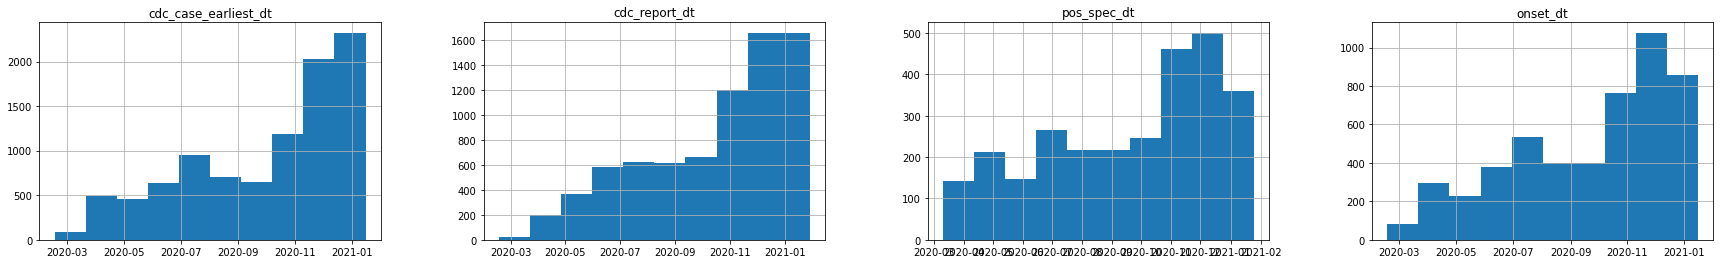

In [25]:
# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_1-1.pdf')

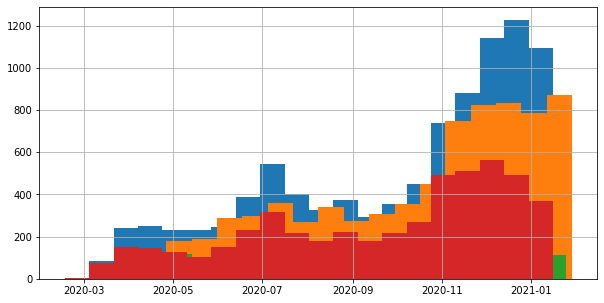

In [26]:
for col in continuous_columns:
#         df[col] = df[col].astype('datetime64[D]')
#         df[col] = df[col].astype('object')  
        f = df[col].hist( figsize=(10,5), bins=20)
#         plt.title(col)
#         plt.ylabel('number of entries')
#         plt.show()   

### - Plot bar plots individual sheet for all the categorical features.


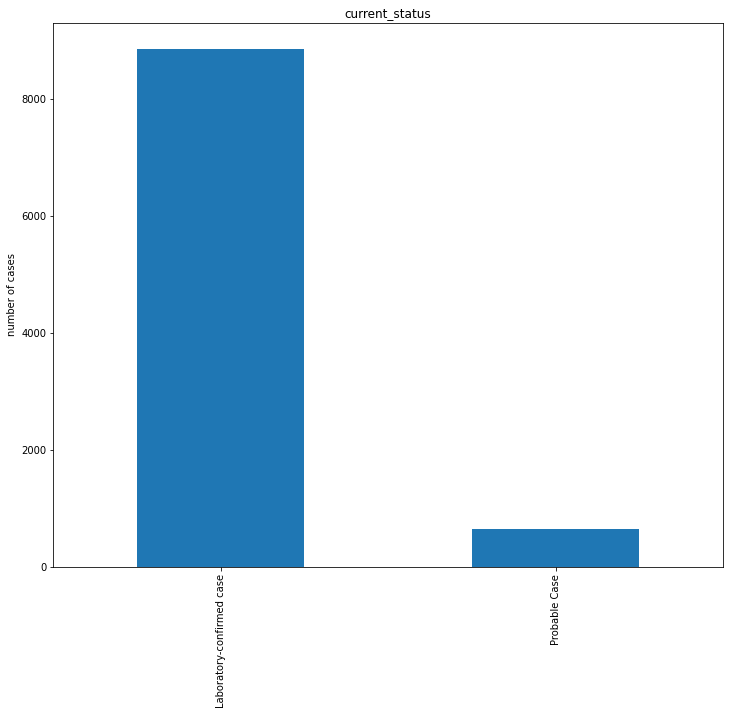

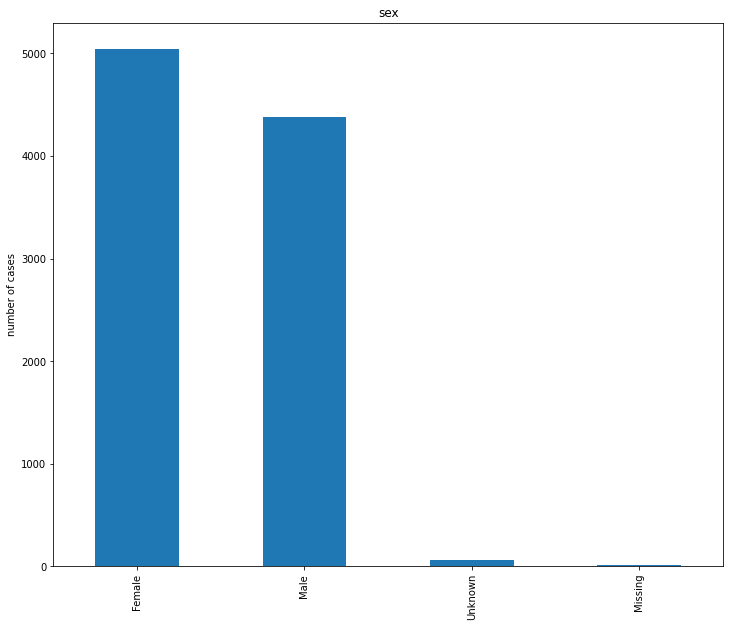

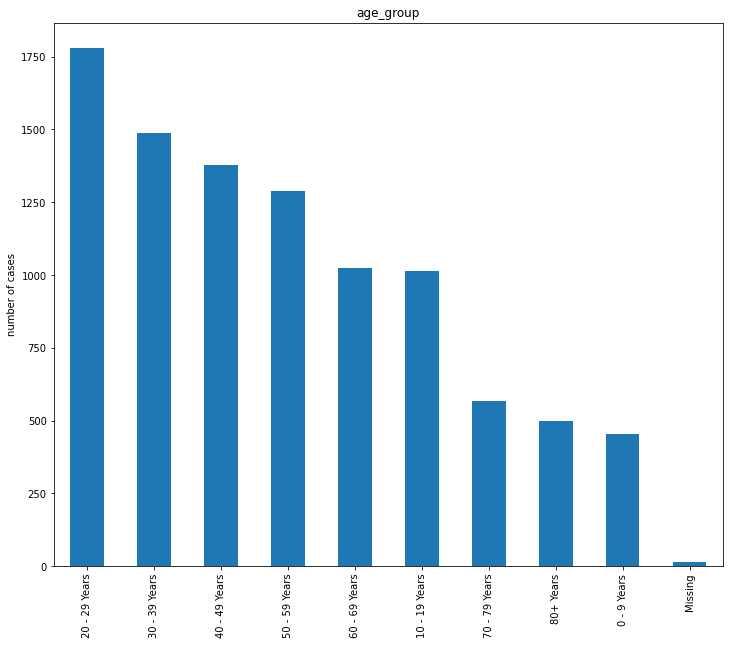

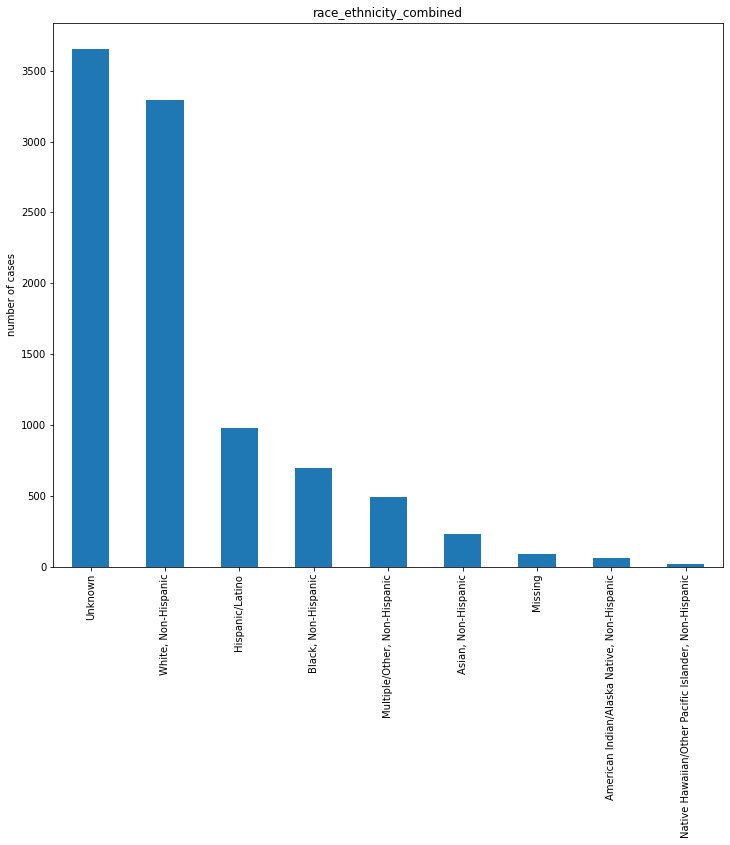

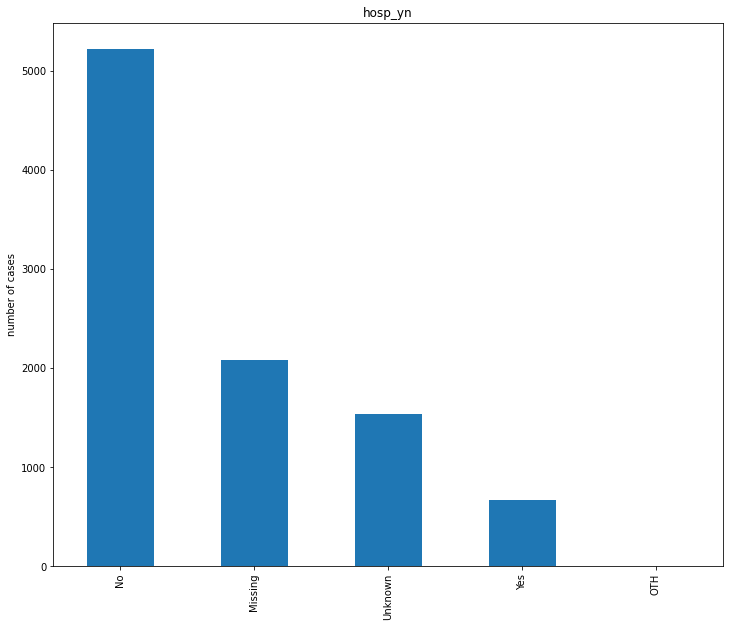

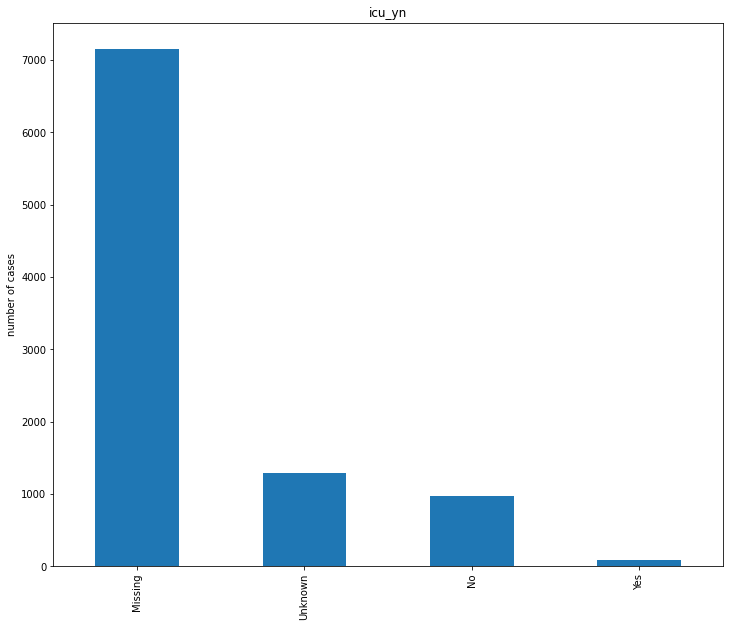

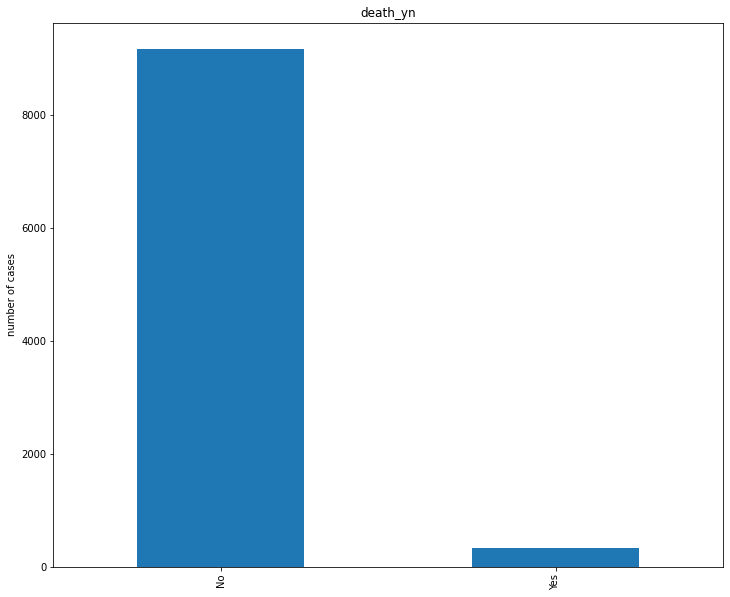

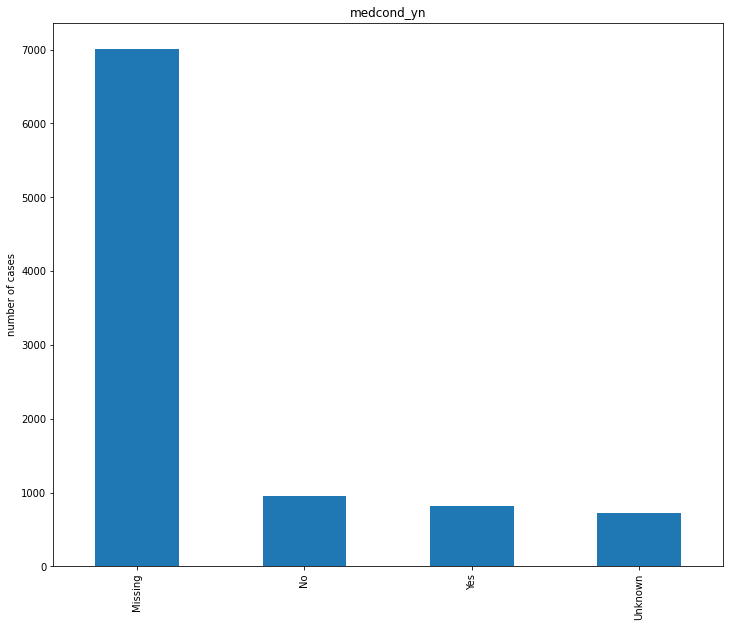

In [27]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('number of cases')
        pp.savefig(f.get_figure())
        plt.show()

**Running Assessment:**

-  The **cardinalities** of the Categorical features make sense. The low value is explained as being a binary, as previously noted; and there are no very high values which could either be anomolous or present problems for machine learning algorithms. 
<br>

-  **missing values** and **Unknown** are group together in the Categorical features.
<br>

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

### - Propose solutions to deal with the problems identified. 

1. **cdc_case_earliest_dt later than cdc_report_dt **
- Replace with the earilest date 

2. **cdc_report_dt** 
- Drop it 

3. **pos_spec_dt** 
- Replace with the earilest date with cdc_case_earliest_dt

4. **pos_spec_dt** 
- Drop it 

5. **onset_dt** is later than pos_spec_dt -> derived asymptomatic

6. **sex** 
- Since very few rows affected, drop rows with missing values after checking against other columns for logical integrity and whether any useful information can be extracted (eg how it is related to the target class.). 

7. **age_group ** 
- Since very few rows affected, drop rows with missing values after checking against other columns for logical integrity and whether any useful information can be extracted.

8. **race_ethnicity_combined**, **hosp_yn**,**icu_yn** and **medcond_yn** 
- Combine into single Unknown value and keep.


### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 


In [28]:
test_1 = df[['cdc_case_earliest_dt']][df['cdc_case_earliest_dt']>df['cdc_report_dt']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1

Number of rows failing the test:  36


,cdc_case_earliest_dt
373,2020-11-10
403,2020-09-26
486,2020-08-24
877,2020-06-20
1489,2020-06-27
2127,2020-11-30
2159,2021-01-15
2377,2020-12-12
3088,2020-10-20
3449,2020-11-13


In [29]:
#**cdc_case_earliest_dt later than cdc_report_dt **
#- Replace with the earilest date 
df.loc[df['cdc_case_earliest_dt']>df['cdc_report_dt'], 'cdc_case_earliest_dt'] = df['cdc_report_dt']
df.to_csv("test.csv")

In [30]:
test_1 = df[['cdc_case_earliest_dt','cdc_report_dt']][df['cdc_case_earliest_dt']>df['cdc_report_dt']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1

Number of rows failing the test:  0


,cdc_case_earliest_dt,cdc_report_dt


2. **cdc_report_dt** 
    - Drop it 

In [31]:
df = df.drop(['cdc_report_dt'], axis = 1)
df

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-10-29,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
1,2021-01-11,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing
2,2020-10-27,2020-10-30,2020-10-27,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Unknown,No,Unknown
3,2020-07-09,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
4,2020-10-19,NaT,2020-10-19,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-06-22,2020-06-22,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Missing,Missing,No,Missing
9996,2020-05-24,NaT,2020-05-24,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Missing,No,Missing
9997,2020-05-07,NaT,2020-05-07,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
9998,2021-01-05,NaT,NaT,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Missing,No,Missing


In [32]:
#Perform logical integrity after replacing value of **cdc_case_earliest_dt later than cdc_report_dt **
test_2 = df[['cdc_case_earliest_dt','pos_spec_dt']][df['cdc_case_earliest_dt']>df['pos_spec_dt']]
print("Number of rows failing the test: ", test_2.shape[0])
test_2

Number of rows failing the test:  48


,cdc_case_earliest_dt,pos_spec_dt
234,2020-10-31,2020-10-29
477,2020-05-30,2020-05-26
579,2021-01-01,2020-12-31
828,2020-08-20,2020-08-18
894,2020-10-20,2020-10-19
998,2020-05-14,2020-05-13
1525,2020-05-10,2020-05-07
1564,2020-11-20,2020-11-19
1580,2020-07-30,2020-07-28
1839,2020-11-27,2020-11-25


In [33]:
#**cdc_case_earliest_dt later than pos_spec_dt **
#- Replace with the earilest date 
df.loc[df['cdc_case_earliest_dt']>df['pos_spec_dt'], 'cdc_case_earliest_dt'] = df['pos_spec_dt']
# df.to_csv("test.csv")

In [34]:
#Perform logical integrity after replacing value of **cdc_case_earliest_dt later than cdc_report_dt **
test_2 = df[['cdc_case_earliest_dt','pos_spec_dt']][df['cdc_case_earliest_dt']>df['pos_spec_dt']]
print("Number of rows failing the test: ", test_2.shape[0])
test_2

Number of rows failing the test:  0


,cdc_case_earliest_dt,pos_spec_dt


In [35]:
test_3 = df[['onset_dt','pos_spec_dt']][df['onset_dt']>df['pos_spec_dt']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3

Number of rows failing the test:  83


,onset_dt,pos_spec_dt
234,2020-10-31,2020-10-29
373,2020-11-10,2020-11-09
403,2020-09-26,2020-09-25
477,2020-08-25,2020-05-26
486,2020-08-24,2020-08-18
...,...,...
9156,2020-12-01,2020-11-04
9302,2020-08-31,2020-08-28
9310,2020-09-30,2020-09-28
9686,2020-12-30,2020-12-29


In [36]:
df['day_symptom_onset_after_pos_spec_dt'] = df['onset_dt'] - df['pos_spec_dt']

In [37]:
df['day_symptom_onset_after_pos_spec_dt'] 

0          NaT
1          NaT
2      -3 days
3          NaT
4          NaT
         ...  
9995       NaT
9996       NaT
9997       NaT
9998       NaT
9999       NaT
Name: day_symptom_onset_after_pos_spec_dt, Length: 9504, dtype: timedelta64[ns]

In [38]:
test_3 = df[['onset_dt','pos_spec_dt','day_symptom_onset_after_pos_spec_dt']][df['onset_dt']>df['pos_spec_dt']]
print("Number of rows failing the test: ", test_3.shape[0])
test_3

Number of rows failing the test:  83


,onset_dt,pos_spec_dt,day_symptom_onset_after_pos_spec_dt
234,2020-10-31,2020-10-29,2 days
373,2020-11-10,2020-11-09,1 days
403,2020-09-26,2020-09-25,1 days
477,2020-08-25,2020-05-26,91 days
486,2020-08-24,2020-08-18,6 days
...,...,...,...
9156,2020-12-01,2020-11-04,27 days
9302,2020-08-31,2020-08-28,3 days
9310,2020-09-30,2020-09-28,2 days
9686,2020-12-30,2020-12-29,1 days


# Missing value

In [39]:
for col in categorical_columns:
    print(df[col].value_counts())
    print('---------------------')

Laboratory-confirmed case    8858
Probable Case                 646
Name: current_status, dtype: int64
---------------------
Female     5046
Male       4377
Unknown      66
Missing      15
Name: sex, dtype: int64
---------------------
20 - 29 Years    1778
30 - 39 Years    1489
40 - 49 Years    1378
50 - 59 Years    1290
60 - 69 Years    1023
10 - 19 Years    1015
70 - 79 Years     568
80+ Years         497
0 - 9 Years       453
Missing            13
Name: age_group, dtype: int64
---------------------
Unknown                                                 3653
White, Non-Hispanic                                     3290
Hispanic/Latino                                          975
Black, Non-Hispanic                                      698
Multiple/Other, Non-Hispanic                             490
Asian, Non-Hispanic                                      229
Missing                                                   88
American Indian/Alaska Native, Non-Hispanic               61
Nativ

In [40]:
#Drop the 'Missing' value 
df[['sex']][df['sex'] =='Missing']
df.drop(df[df['sex'] =='Missing'].index, inplace = True)


In [41]:
#Drop the 'Missing' value, since very few rows affected, drop rows with missing values 
df.drop(df[df['age_group'] =='Missing'].index, inplace = True)

In [42]:
combined_columns = df[['cdc_case_earliest_dt','onset_dt','pos_spec_dt','age_group','race_ethnicity_combined','hosp_yn','icu_yn','medcond_yn','day_symptom_onset_after_pos_spec_dt']].columns
# categorical_columns = df[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns

#should wait after initial data 
for column in combined_columns:
    df[column] = df[column].replace('Missing','Unknown')
    df[column] = df[column].fillna('Unknown')

In [43]:
# handle missing value of day_symptom_onset_after_pos_spec_dt
# df['day_symptom_onset_after_pos_spec_dt'] = df['day_symptom_onset_after_pos_spec_dt'].fillna(pd.Timedelta(seconds=999))

In [44]:
df
# for col in df.columns:
#     df[col]=df[col].fillna('Unknown')
# df['day_symptom_onset_after_pos_spec_dt'] = df['day_symptom_onset_after_pos_spec_dt'].fillna(-1)

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,day_symptom_onset_after_pos_spec_dt
0,2020-10-29,Unknown,Unknown,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
1,2021-01-11,Unknown,Unknown,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,Unknown,No,Unknown,Unknown
2,2020-10-27,2020-10-30 00:00:00,2020-10-27 00:00:00,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Unknown,No,Unknown,-3 days +00:00:00
3,2020-07-09,Unknown,Unknown,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
4,2020-10-19,Unknown,2020-10-19 00:00:00,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Unknown,No,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-06-22,2020-06-22 00:00:00,Unknown,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
9996,2020-05-24,Unknown,2020-05-24 00:00:00,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Unknown,No,Unknown,Unknown
9997,2020-05-07,Unknown,2020-05-07 00:00:00,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Unknown,No,Unknown,Unknown
9998,2021-01-05,Unknown,Unknown,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Unknown,No,Unknown,Unknown


In [45]:
#drop pos_spec_dt and onset_dt columns 

df = df.drop(['pos_spec_dt','onset_dt'], axis = 1)
df


,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,day_symptom_onset_after_pos_spec_dt
0,2020-10-29,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
1,2021-01-11,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,Unknown,No,Unknown,Unknown
2,2020-10-27,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Unknown,No,Unknown,-3 days +00:00:00
3,2020-07-09,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
4,2020-10-19,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Unknown,No,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...
9995,2020-06-22,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
9996,2020-05-24,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Unknown,No,Unknown,Unknown
9997,2020-05-07,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Unknown,No,Unknown,Unknown
9998,2021-01-05,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Unknown,No,Unknown,Unknown


In [46]:
df.sort_values(by='cdc_case_earliest_dt', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[df.columns].head(50)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,day_symptom_onset_after_pos_spec_dt
8124,2021-01-16,Laboratory-confirmed case,Male,40 - 49 Years,"Black, Non-Hispanic",No,Unknown,No,Unknown,-4 days +00:00:00
6733,2021-01-16,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
6137,2021-01-16,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
5173,2021-01-16,Laboratory-confirmed case,Unknown,50 - 59 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
3658,2021-01-16,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,Unknown,-2 days +00:00:00
3553,2021-01-16,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
1168,2021-01-16,Probable Case,Female,40 - 49 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown
9872,2021-01-16,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Unknown,No,Unknown,Unknown
4978,2021-01-16,Probable Case,Male,70 - 79 Years,Unknown,No,Unknown,No,Unknown,Unknown
6037,2021-01-16,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,Unknown,No,Unknown,Unknown


In [47]:
df['month'] = df['cdc_case_earliest_dt']
df['month']= pd.DatetimeIndex(df['month']).month
df['seasons'] = df['month']
# df['month'].astype('int64')
df['seasons'].astype('int64')
# df['seasons'] = df['seasons'].replace({1: "winter", 12: "winter",2:"winter"}, inplace=True)

df['seasons'].replace({1:"Winter",12:"Winter",2:"Winter",6:"Summer",7:"Summer",8:"Summer",3:"Spring",4:"Spring",5:"Spring",9:"Autumn",10:"Autumn",11:"Autumn"}, inplace=True)
df['seasons']

0       Autumn
1       Winter
2       Autumn
3       Summer
4       Autumn
         ...  
9995    Summer
9996    Spring
9997    Spring
9998    Winter
9999    Spring
Name: seasons, Length: 9476, dtype: object

In [48]:
# # stu_df = pd.DataFrame(students, columns =['Name', 'Age', 'Section'], 
# #                       index =['1', '2', '3', '4'])
# stu_df = pd.DataFrame(columns =['day_symptom_onset_after_pos_spec_dt'])
# # gives a tuple of column name and series
# # for each column in the dataframe
# for (columnName, columnData) in stu_df.iteritems():
#     print('Colunm Name : ', columnName)
#     print('Column Contents : ', columnData)

In [49]:
df

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,day_symptom_onset_after_pos_spec_dt,month,seasons
0,2020-10-29,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown,10,Autumn
1,2021-01-11,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,Unknown,No,Unknown,Unknown,1,Winter
2,2020-10-27,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Unknown,No,Unknown,-3 days +00:00:00,10,Autumn
3,2020-07-09,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown,7,Summer
4,2020-10-19,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Unknown,No,Unknown,Unknown,10,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020-06-22,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown,Unknown,6,Summer
9996,2020-05-24,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Unknown,No,Unknown,Unknown,5,Spring
9997,2020-05-07,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Unknown,No,Unknown,Unknown,5,Spring
9998,2021-01-05,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Unknown,No,Unknown,Unknown,1,Winter


### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [50]:
df.dtypes

cdc_case_earliest_dt                   datetime64[ns]
current_status                               category
sex                                          category
age_group                                    category
race_ethnicity_combined                      category
hosp_yn                                      category
icu_yn                                       category
death_yn                                     category
medcond_yn                                   category
day_symptom_onset_after_pos_spec_dt            object
month                                           int64
seasons                                        object
dtype: object

In [51]:
# df['day_symptom_onset_after_pos_spec_dt'] = df['day_symptom_onset_after_pos_spec_dt'].astype('int64')  

In [52]:
# Print table with continuous statistics
continuous_columns = df.select_dtypes(['datetime64[ns]']).columns
df[continuous_columns].describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9476,322,2020-12-28,99,2020-02-17,2021-01-16


In [53]:
# Print table with categorical statistics
df.select_dtypes(['category','object']).describe().T

,count,unique,top,freq
current_status,9476,2,Laboratory-confirmed case,8847
sex,9476,3,Female,5044
age_group,9476,9,20 - 29 Years,1778
race_ethnicity_combined,9476,8,Unknown,3725
hosp_yn,9476,4,No,5204
icu_yn,9476,3,Unknown,8426
death_yn,9476,2,No,9137
medcond_yn,9476,3,Unknown,7703
day_symptom_onset_after_pos_spec_dt,9476,50,Unknown,7971
seasons,9476,4,Winter,3206


In [54]:
# Write the cleaned dataframe to a csv file
df.to_csv('Covid19_cleaned.csv', index=False)